In [ ]:
from google.colab import files

uploaded = files.upload()

Saving E-Commerce Data.csv to E-Commerce Data (1).csv


In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
df = pd.read_csv('/content/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()  # Drop missing values

In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='UnitPrice', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features (you may need to select appropriate features and preprocess them)
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

# Define a binary target variable (Example: Large transaction if Quantity > 50)
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import time
import psutil
from sklearn.ensemble import RandomForestClassifier

# Record the start time and CPU + RAM usage
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)
ram_start = psutil.virtual_memory().used / (1024**3)  # in GB

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Convert all features to numeric (handle potential errors)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values from BOTH X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index] # Keep only the target values corresponding to non-missing features

rf.fit(X_train, y_train)

# Record the end time and CPU + RAM usage
cpu_end = psutil.cpu_percent(interval=None)
ram_end = psutil.virtual_memory().used / (1024**3)  # in GB
end_time = time.time()

# Calculate the training time and resource usage
training_time = end_time - start_time
cpu_usage = cpu_end - cpu_start
ram_usage = ram_end - ram_start

print(f"Training time: {training_time} seconds")
print(f"CPU usage: {cpu_usage}%")
print(f"RAM usage: {ram_usage} GB")

Training time: 77.39368844032288 seconds
CPU usage: 43.2%
RAM usage: 0.13312149047851562 GB


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Missing values in X_train after conversion:
 InvoiceNo         7397
StockCode            0
Description          0
UnitPrice            0
CustomerID      107957
Country              0
InvoiceMonth         0
dtype: int64

Missing values in X_test after conversion:
 InvoiceNo        1894
StockCode           0
Description         0
UnitPrice           0
CustomerID      27123
Country             0
InvoiceMonth        0
dtype: int64

Train Scores:
 [[0.97009302 0.96981828 0.96981828 0.96981828 0.96981828]
 [0.97070136 0.9699949  0.9699949  0.9699949  0.9699949 ]
 [0.97112693 0.97114001 0.97060363 0.97060363 0.97060363]
 [0.97072127 0.97073109 0.97095676 0.97095676 0.97095676]
 [0.97048596 0.97049381 0.97083134 0.97089413 0.97089413]
 [0.97060363 0.97061017 0.97061017 0.97083257 0.97083257]
 [0.97081102 0.97081663 0.97081663 0.97058675 0.97058675]
 [0.9709569  0.97096181 0.97096181 0.9709569  0.97076557]
 [0.97070393 0.97070829 0.97070829 0.97070393 0.9706516 ]
 [0.97082349 0.97082741 0.97082

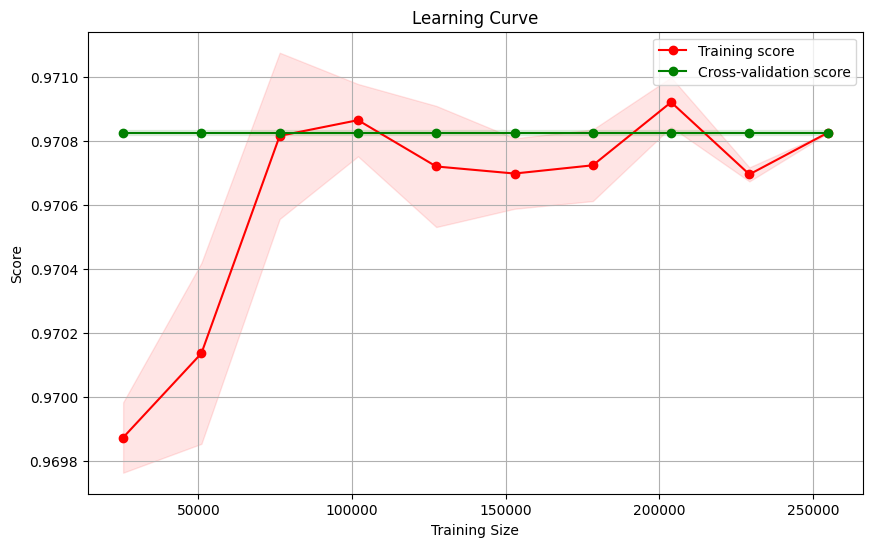

In [ ]:
%matplotlib inline

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Load your DataFrame
df = pd.read_csv('/content/E-Commerce Data.csv', encoding='latin-1')

# Recreate the 'LargeTransaction' column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode 'StockCode', 'Description', and 'Country' columns
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Enhanced Error Handling and Debugging ---

# Convert all features to numeric (handle potential errors)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for missing values AFTER conversion
print("Missing values in X_train after conversion:\n", X_train.isnull().sum())
print("\nMissing values in X_test after conversion:\n", X_test.isnull().sum())

# Drop rows with any missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with the dropped rows in X_train
X_test = X_test.dropna()
y_test = y_test[X_test.index]    # Align y_test as well

# --- End of Enhanced Error Handling ---

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lr = LogisticRegression()

# Generate the learning curve with StratifiedKFold
cv = StratifiedKFold(n_splits=5)
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train_scaled, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Print raw scores for inspection
print("\nTrain Scores:\n", train_scores)
print("\nTest Scores:\n", test_scores)

# Calculate mean and standard deviation (handle potential NaNs)
train_scores_mean = np.nanmean(train_scores, axis=1)
train_scores_std = np.nanstd(train_scores, axis=1)
test_scores_mean = np.nanmean(test_scores, axis=1)
test_scores_std = np.nanstd(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

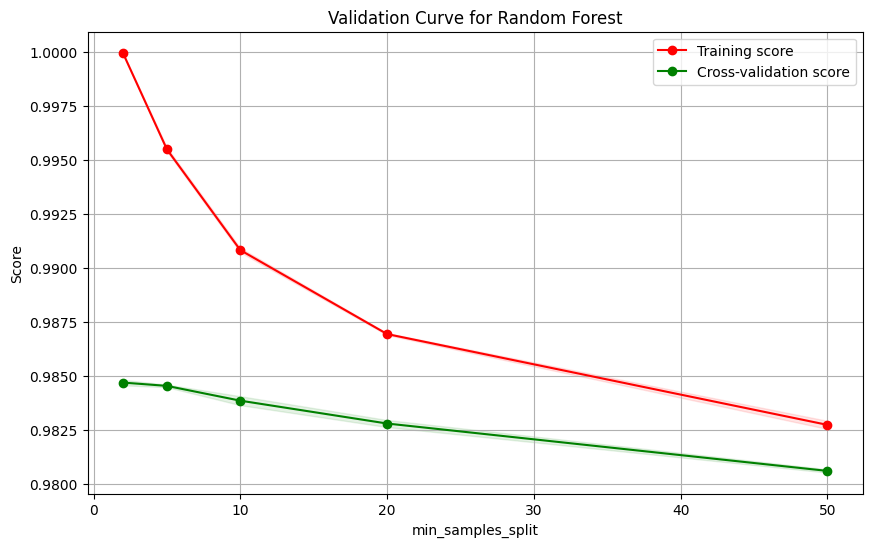

In [ ]:
from sklearn.model_selection import validation_curve

# Example: Effect of `min_samples_split` regularization parameter
param_range = [2, 5, 10, 20, 50]
train_scores, test_scores = validation_curve(rf, X_train, y_train, param_name="min_samples_split", param_range=param_range, cv=3, n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Validation Curve for Random Forest')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('Validation_Curve_min_samples_split.png')
plt.show()

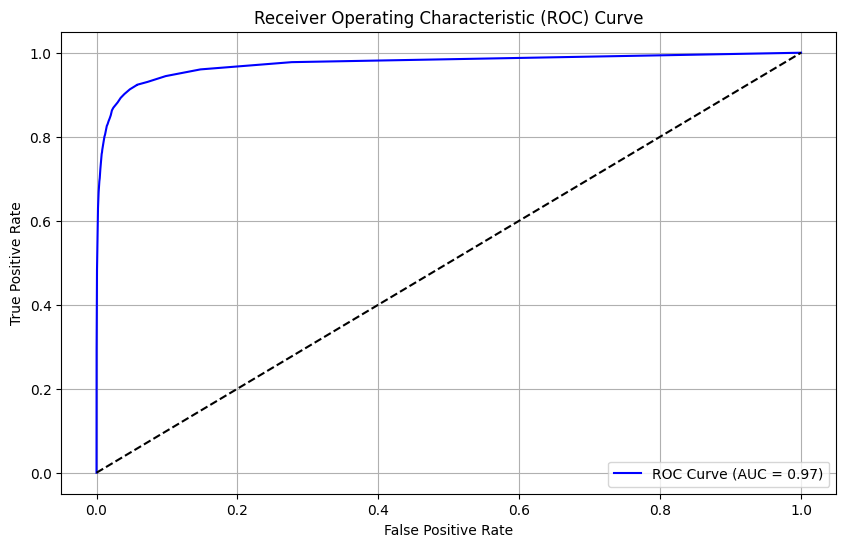

Accuracy: 0.99
Precision: 0.92
Recall: 0.60
F1 Score: 0.72
AUC: 0.97


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Fit the model to your training data (if you haven't already in this session)
rf.fit(X_train, y_train)  # Make sure X_train and y_train are defined and preprocessed

# Make predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.savefig('ROC_Curve.png')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")